# Reinforcement Learning 

### Ref: https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning

## Multi-Armed Bandit Example

Assume you're at a casino and in a section with some slot machines. Let's say you're at a section with 10 slot machines in a row and it says "Play for free! Max payout is 10 dollars" Each slot machine is guaranteed to give you a reward between 0 and 10 dollars. Each slot machine has a different average payout, and you have to figure out which one gives the most average reward so that you can maximize your reward in the shortest time possible.

<b>ϵ (epsilon)-greedy algorithm</b>

One very famous approach to solving reinforcement learning problems is the ϵ (epsilon)-greedy algorithm, such that, with a probability ϵ, you will choose an action a at random (exploration), and the rest of the time (probability 1−ϵ) you will select the best lever based on what you currently know from past plays (exploitation). So most of the time you play greedy, but sometimes you take some risks and choose a random lever and see what happens.

In [23]:
#import required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [26]:
#10-armed bandit problem, hence n = 10
n = 10
arms = np.random.rand(n)
eps = 0.1 #probability of exploration action

In [27]:
# reward function
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [28]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value

In [29]:
#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

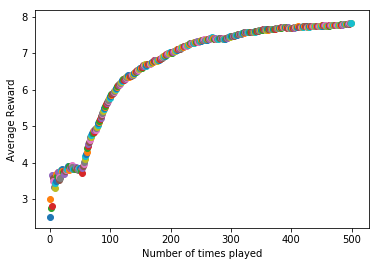

In [31]:
# play it 500 times
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
    if random.random() > eps: #greedy exploitation action
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)

Agent learns to choose the arm which gives it the maximum average reward after several iterations of gameplay. Thus, you've implemented a straightforward reinforcement learning algorithm to solve the Multi-Arm Bandit problem.